<a href="https://colab.research.google.com/github/amara929/amara929/blob/main/Vivian_Ingaitsa_PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


PROBLEM


In this project, we delve into the dynamic realm of cryptocurrency trading by analyzing a comprehensive Bitcoin dataset. The dataset captures detailed Bitcoin transactions over a significant period, providing rich insights into trading volumes, timestamps, and transaction behaviors. Our primary objective is to enhance investment strategies and optimize market performance through effective investor segmentation. To achieve this, we transform the transactional data into an investor-centric dataset by engineering new features that enable the segmentation of investors into distinct clusters using the K-means clustering algorithm. This segmentation will help us uncover unique trading patterns and profiles among different investor groups. Building on these insights, we aim to develop a recommendation system that suggests top-performing cryptocurrencies to investors within each segment—particularly those assets that they have yet to explore—ultimately driving more informed investment decisions and maximizing returns.

OBJECTIVE

The objective of Bitcoin dataset analysis is to uncover trends, patterns, and insights from historical and real-time Bitcoin data. This includes analyzing price fluctuations, market volatility, and trading volume to understand market behavior. It also involves studying correlations with other assets, predicting future prices using machine learning, and assessing the impact of news and events on Bitcoin value. Additionally, transaction analysis helps identify blockchain activity and detect anomalies or suspicious movements. Overall, the goal is to enhance decision-making for traders, investors, and researchers in the cryptocurrency space.

Step1:Setup and initialisation


Step1.1: Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Step1.2: Loading dataset

I am  going to load the dataset for reading

In [ ]:
df = pd.read_csv('/content/Bitcoin.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2683 non-null   object 
 1   Open       2683 non-null   float64
 2   High       2683 non-null   float64
 3   Low        2683 non-null   float64
 4   Close      2683 non-null   float64
 5   Adj Close  2683 non-null   float64
 6   Volume     2683 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 146.9+ KB


,Open,High,Low,Close,Adj Close,Volume
count,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2.683000e+03
mean,10989.900302,11286.625175,10662.957284,11003.581793,11003.581793,1.459304e+10
std,15902.616531,16331.949304,15408.069197,15908.160803,15908.160803,2.008458e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,601.778015,606.707001,596.048005,602.733490,602.733490,7.839140e+07
50%,6235.029785,6371.549805,6093.669922,6238.049805,6238.049805,4.999240e+09
75%,10316.638183,10495.605957,10067.539062,10317.936035,10317.936035,2.445092e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Step1.3 Data Cleaning

In [ ]:

# Handling Missing Data
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:

# Handling duplicates
print("\nChecking for duplicates:")
print(df.duplicated().sum()) #Count duplicate rows
df = df.drop_duplicates() # Remove duplicate rows


Checking for duplicates:
0


In [ ]:
#convet 'Date' To a datetime and set as index
pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:

# Ensure the index is a DatetimeIndex
df.index = pd.to_datetime(df.index)

STEP 2.Exploring Data

This sector we're going to use Time series forecasting

In [ ]:

df1 = pd.read_csv('/content/Bitcoin.csv', parse_dates=True, index_col = ['Date'])
df1.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14',
               '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18',
               '2022-01-19', '2022-01-20'],
              dtype='datetime64[ns]', name='Date', length=2683, freq=None)

In [ ]:

# Select the Bitcoin Data for November 2021
df.loc['2021-11-09']

,2021-11-09
Open,6.754973e+04
High,6.853034e+04
Low,6.638206e+04
Close,6.697183e+04
Adj Close,6.697183e+04
Volume,4.235799e+10


In [ ]:

# 3. Statistical Methods for EDA
# 3.1 Key Statistics
print("Mean:", df['High'].mean())
print("Variance:", df['High'].var())
print("Correlation Matrix:\n", df.select_dtypes(include=[np.number]).corr())

Mean: 11286.625174832647
Variance: 266732568.06480837
Correlation Matrix:
                Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999535  0.999096  0.998846   0.998846  0.733541
High       0.999535  1.000000  0.999042  0.999496   0.999496  0.737056
Low        0.999096  0.999042  1.000000  0.999400   0.999400  0.726051
Close      0.998846  0.999496  0.999400  1.000000   1.000000  0.732466
Adj Close  0.998846  0.999496  0.999400  1.000000   1.000000  0.732466
Volume     0.733541  0.737056  0.726051  0.732466   0.732466  1.000000


Step3 Data Visualisation

In [ ]:

# 3. Advanced Data Visualization
# 3.1.2 Creating Interactive charts with plotly
fig = px.scatter(df, x='Low', y='High', color='Volume', title='Low vs High') # Creating an interactive scatter plot
fig.show() # Displaying the scatter plot

Step3.2Correlation Heatmap

Generating a heatmap to visualize the correlation between different features in the dataset.

This heatmap helps in identifying relationships between different features in the dataset.

It can reveal strong positive or negative correlations, which can be useful in feature selection and model improvement.

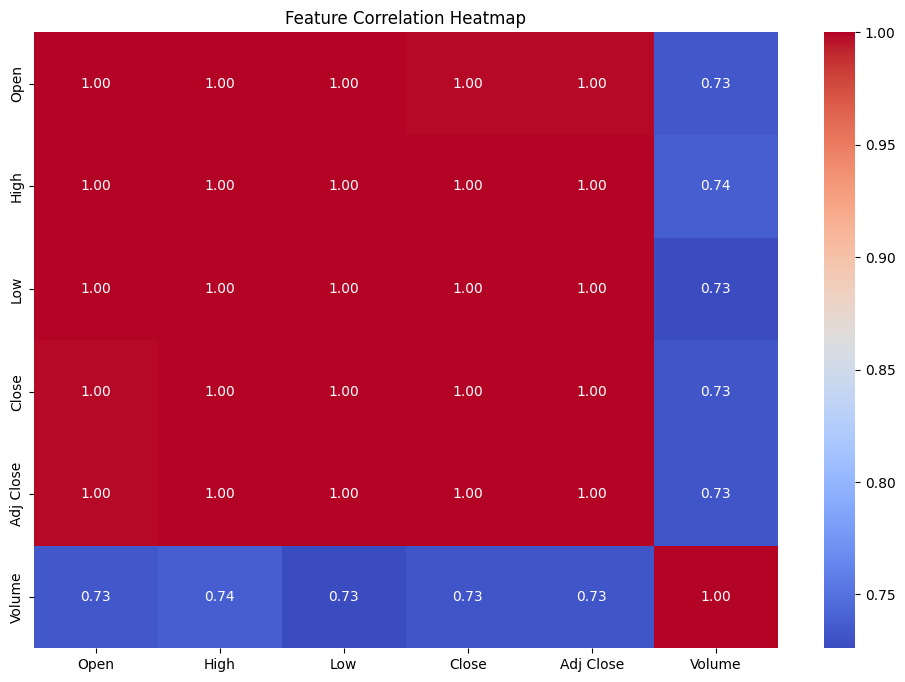

In [ ]:

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Step3.3Box Plot

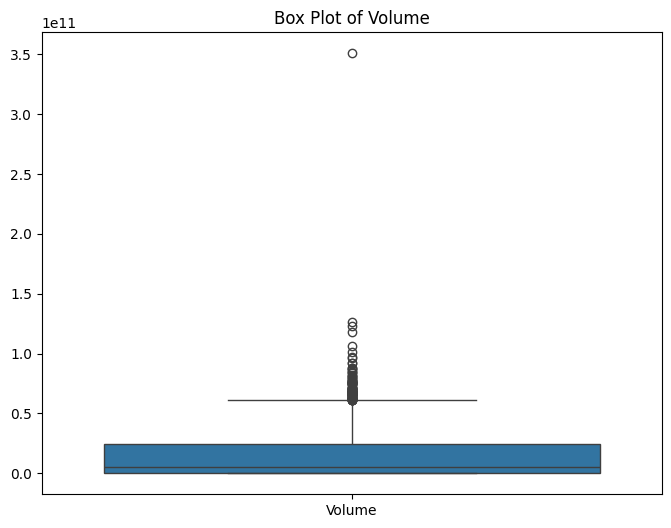

In [ ]:

# Box Plot
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['Volume']])
plt.title('Box Plot of Volume')
plt.show()

This code generates a box plot to visualize the distribution of the "Volume" variable from the DataFrame df using the Seaborn and Matplotlib libraries. First, plt.figure(figsize=(8,6)) sets the figure size to 8x6 inches. Then, sns.boxplot(data=df[['Volume']]) creates a box plot specifically for the "Volume" column, which helps in identifying the median, quartiles, and potential outliers in the data. The plt.title('Box Plot of Volume') function adds a title to the plot for better readability. Finally, plt.show() displays the plot. This visualization is useful for detecting skewness, spread, and outliers in the "Volume" data.

Step3.4Pair plot

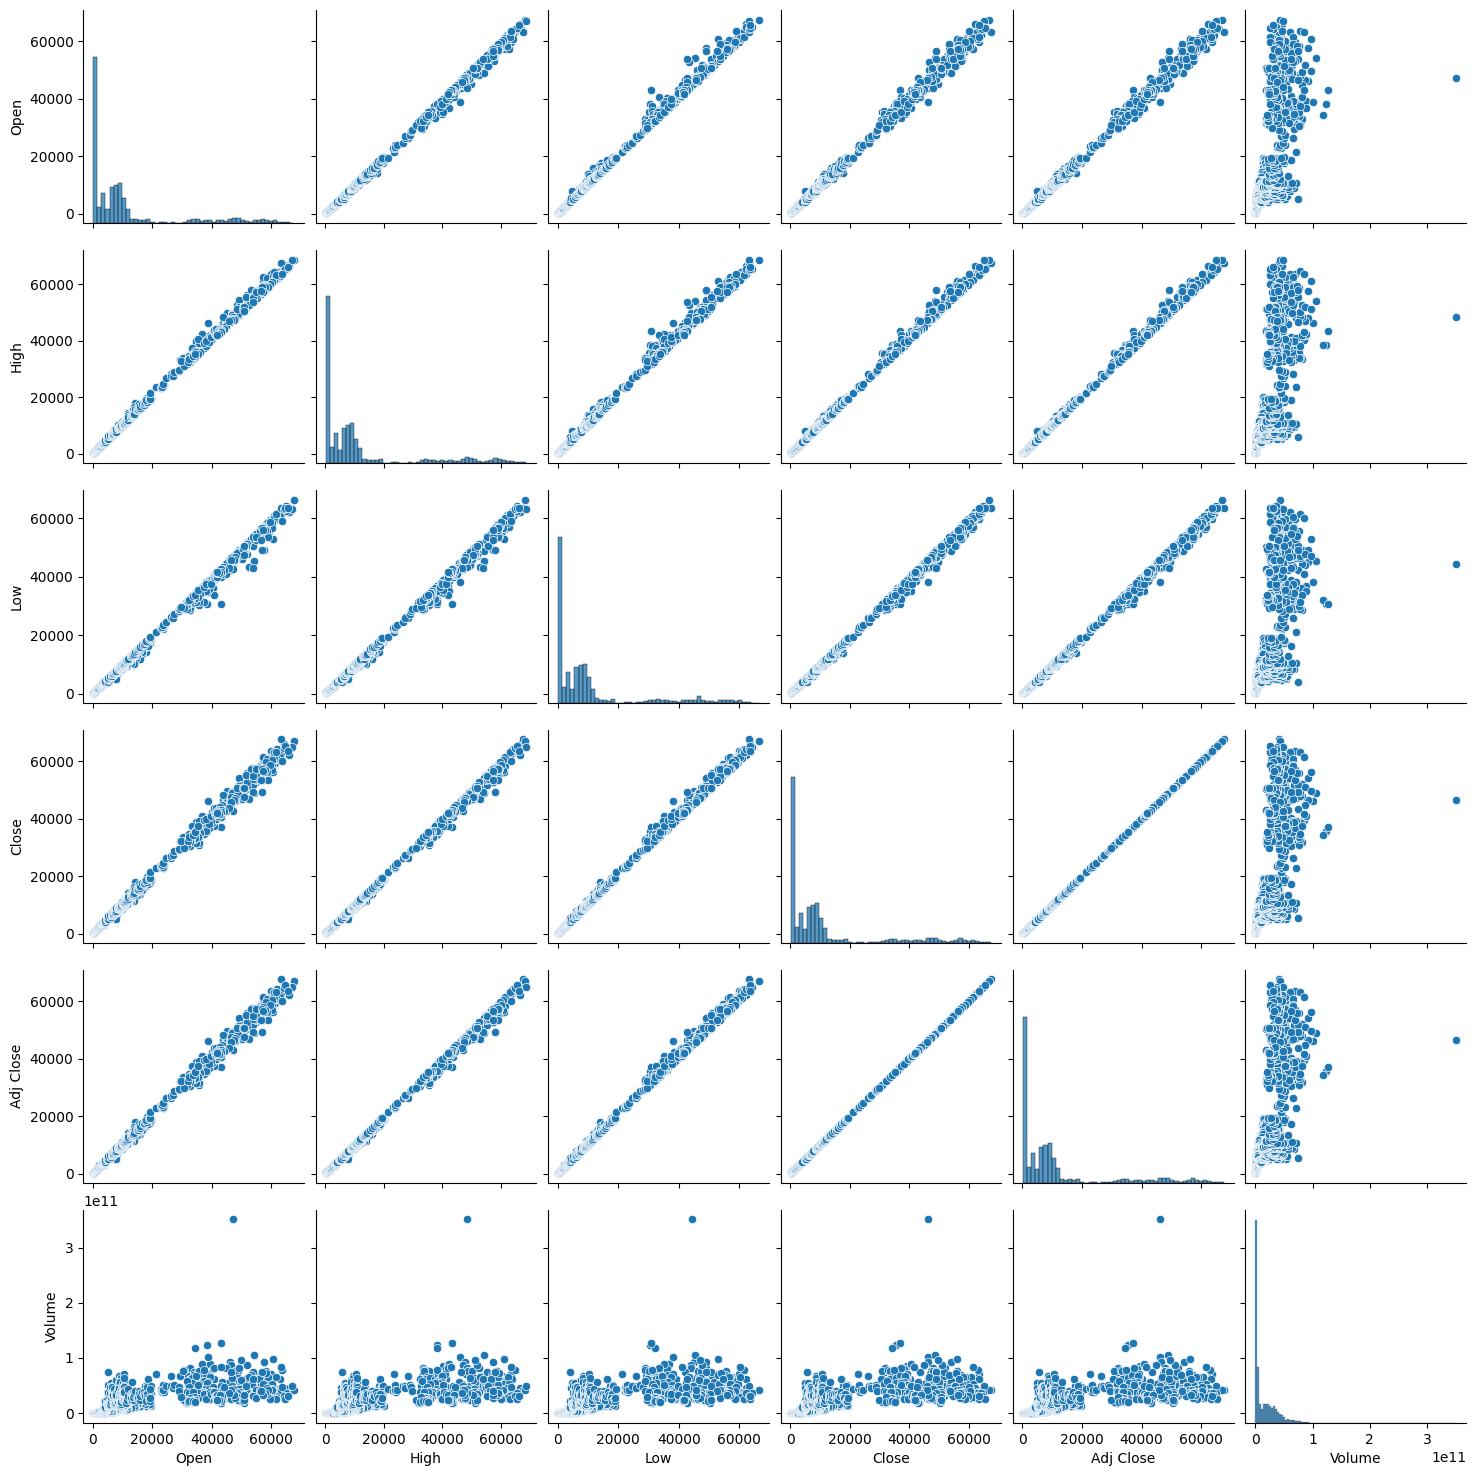

In [ ]:


sns.pairplot(df)
plt.show()

The code sns.pairplot(df) generates a pair plot using Seaborn, a data visualization library in Python. A pair plot is a grid of scatter plots that visualizes pairwise relationships between numerical columns in a DataFrame (df). Each subplot shows the relationship between two different variables, while the diagonal typically contains histograms or kernel density estimates (KDEs) of individual features. This visualization helps identify correlations, patterns, and outliers in the dataset. The plt.show() function from Matplotlib is used to display the generated plot.

Step4Time series decomposition

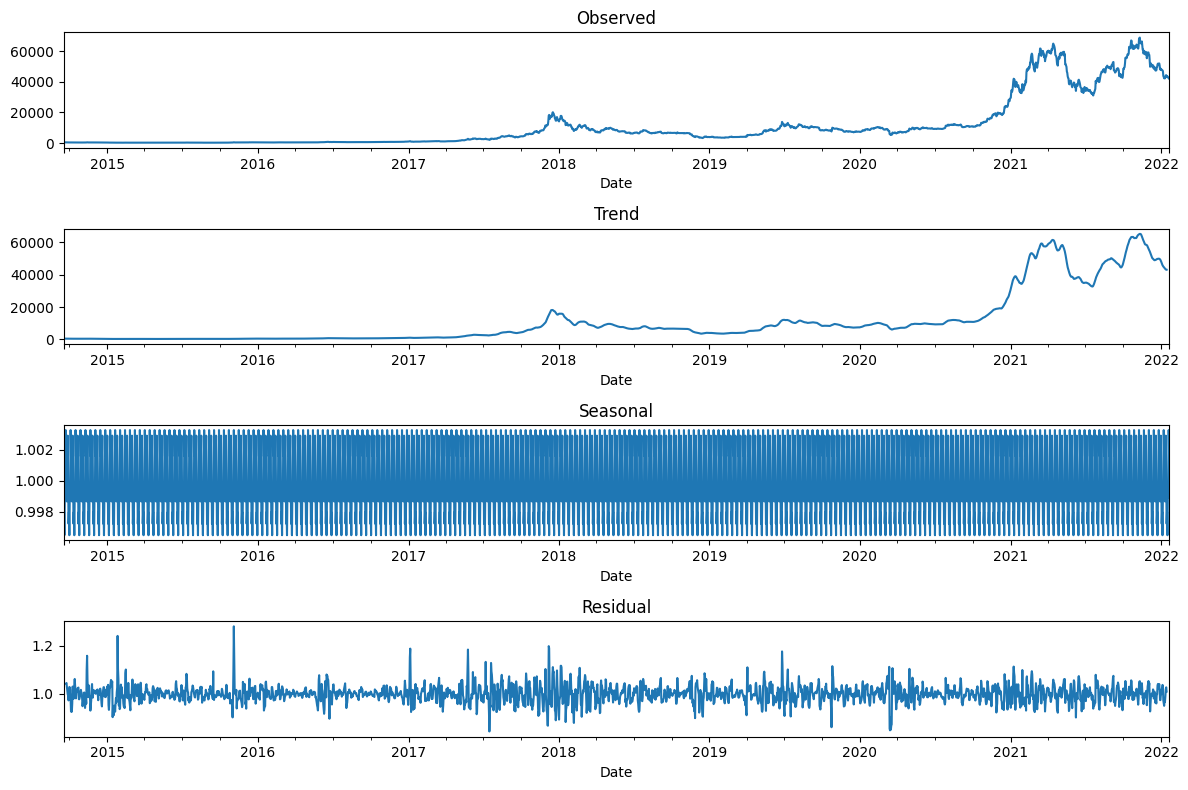

In [ ]:
#Time Series Decomposition
decomposition = seasonal_decompose(df['High'], model='multiplicative', period=12)
fig, axes = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

The code performs time series decomposition on the 'High' column of a DataFrame (df) using a multiplicative model with a period of 12, meaning it assumes seasonal effects scale with the data rather than being additive. The seasonal_decompose function breaks the time series into four components: observed, trend, seasonal, and residual. A subplot with four rows is created to visualize these components separately. The observed (original data) is plotted in the first row, followed by the trend (long-term pattern), seasonal (recurring patterns), and residual (remaining noise) components. plt.tight_layout() ensures the plots are neatly arranged, and plt.show() displays them.

In [ ]:
#Splitting Data
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

The given code snippet splits a dataset (df) into training and testing sets using an 80-20 ratio. First, it calculates train_size as 80% of the total number of rows in df by multiplying len(df) by 0.8 and converting the result to an integer. Then, it uses .iloc (index-based selection) to create two subsets: train, which contains the first train_size rows (80% of the data), and test, which contains the remaining rows (20% of the data). This method ensures that the dataset is divided sequentially, preserving the original order of the data.

Step 5
Sarima Model

In [ ]:
#SARIMA Model Training
train_data = train[['High']]
test_data = test[['High']]
model = SARIMAX(train_data, order=(1, 1, 1), Volume_order=(1, 1, 1, 12))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['Volume_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 2146
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -14866.702
Date:                Tue, 01 Apr 2025   AIC                          29739.404
Time:                        13:06:11   BIC                          29756.417
Sample:                             0   HQIC                         29745.629
                               - 2146                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0437      0.033     -1.325      0.185      -0.108       0.021
ma.L1          0.2847      0.033      8.587      0.000       0.220       0.350
sigma2      6.145e+04    568.302    108.138      0.0

In [ ]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error # Import necessary functions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
mae = mean_absolute_error(test['High'], predictions) # Comparing predictions to 'High' values in test data
mse = mean_squared_error(test['High'], predictions) # Comparing predictions to 'High' values in test data
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

MAE: 27299.44855373627, MSE: 1039089702.3785071, RMSE: 32234.914338004797


The given Python code evaluates the predictive performance of a trained model by comparing its forecasts to actual values in a test dataset. The predict function generates predictions for the test period, starting from the length of the training data and extending to the end of the test set. The predictions are then compared to the actual 'High' values in the test dataset using three error metrics: Mean Absolute Error (MAE), which measures the average absolute difference between predictions and actual values; Mean Squared Error (MSE), which calculates the average squared differences (giving more weight to larger errors); and Root Mean Squared Error (RMSE), which takes the square root of MSE to provide an error measure in the same unit as the original data. Finally, these metrics are printed to assess the accuracy of the model.

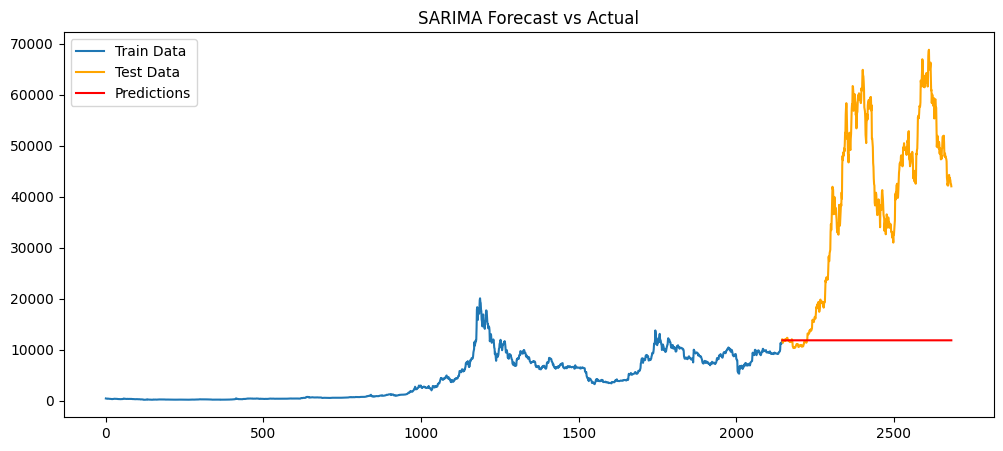

In [ ]:
# Plotting Predictions
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['High'], label='Train Data') # specify x and y values explicitly
plt.plot(test.index, test['High'], label='Test Data', color='orange') # specify x and y values explicitly
plt.plot(test.index, predictions, label='Predictions', color='red') # specify x and y values explicitly for prediction
plt.legend()
plt.title('SARIMA Forecast vs Actual')
plt.show()

The given Python code uses Matplotlib to visualize the SARIMA model's predictions against actual stock price data. It first creates a figure with a specified size of 12x5 inches. Then, it plots three lines: (1) the training data using its index for the x-axis and the 'High' prices for the y-axis, (2) the test data with the same x-axis but colored orange, and (3) the predicted values from the model, also using the test data's index but colored red. A legend is added to differentiate between these datasets, and a title, "SARIMA Forecast vs Actual", is set to describe the plot. Finally, plt.show() displays the plot, helping to visually compare the predicted values against real stock price movements.

In [ ]:
# Forecasting Future Values
future_steps = 60
forecast = model_fit.forecast(steps=future_steps)
print(f'Forecasted Values:\n{forecast}')

Forecasted Values:
2146    11865.297674
2147    11862.216972
2148    11862.351550
2149    11862.345671
2150    11862.345928
2151    11862.345917
2152    11862.345917
2153    11862.345917
2154    11862.345917
2155    11862.345917
2156    11862.345917
2157    11862.345917
2158    11862.345917
2159    11862.345917
2160    11862.345917
2161    11862.345917
2162    11862.345917
2163    11862.345917
2164    11862.345917
2165    11862.345917
2166    11862.345917
2167    11862.345917
2168    11862.345917
2169    11862.345917
2170    11862.345917
2171    11862.345917
2172    11862.345917
2173    11862.345917
2174    11862.345917
2175    11862.345917
2176    11862.345917
2177    11862.345917
2178    11862.345917
2179    11862.345917
2180    11862.345917
2181    11862.345917
2182    11862.345917
2183    11862.345917
2184    11862.345917
2185    11862.345917
2186    11862.345917
2187    11862.345917
2188    11862.345917
2189    11862.345917
2190    11862.345917
2191    11862.345917
2192    11862.3

The code generates a 60-step-ahead forecast using a trained time series model. The variable future_steps is set to 60, indicating the number of future time points to predict. The forecast method of the fitted model (model_fit) is then called with steps=future_steps, which produces a sequence of 60 predicted values. These forecasted values represent the model's estimation of future trends based on historical patterns. Finally, the predicted values are printed, allowing the user to review the forecasted results.

In [ ]:
# User Input & Prediction
steps = int(input("Enter the number of future steps to predict: "))
user_forecast = model_fit.forecast(steps=steps)
print(f'Predicted values for next {steps} steps:\n{user_forecast}')

Enter the number of future steps to predict: 3
Predicted values for next 3 steps:
2146    11865.297674
2147    11862.216972
2148    11862.351550
Name: predicted_mean, dtype: float64


This code allows the user to specify how many future time steps they want the model to predict. It first prompts the user to input a number, which is converted to an integer and stored in the variable steps. The trained model (model_fit) then generates a forecast for the specified number of steps using the forecast method. Finally, the predicted values are printed, displaying the model's estimated future values based on historical data. This interactive approach makes the forecasting process more flexible, allowing users to explore different time horizons.

In [ ]:
# User Input & Prediction
steps = int(input("Enter the number of future steps to predict: "))
user_forecast = model_fit.forecast(steps=steps)
print(f'Predicted values for next {steps} steps:\n{user_forecast}')

Enter the number of future steps to predict: 12
Predicted values for next 12 steps:
2146    11865.297674
2147    11862.216972
2148    11862.351550
2149    11862.345671
2150    11862.345928
2151    11862.345917
2152    11862.345917
2153    11862.345917
2154    11862.345917
2155    11862.345917
2156    11862.345917
2157    11862.345917
Name: predicted_mean, dtype: float64


The code enables user-driven forecasting by allowing them to specify how many future time steps they want to predict. It first takes an integer input from the user (steps), which represents the number of future periods to forecast. The trained time series model (model_fit) then generates predictions for the specified number of steps using the forecast method. Finally, the forecasted values are printed, providing the predicted outcomes for the next steps time periods. This interactive approach enhances flexibility, enabling users to analyze different forecasting horizons dynamically.

Step 6.Hypothesis Training

The code is performing a two-sample t-test to compare the means of the adjusted closing prices (Adj Close) for two different groups based on the 'Volume' column, which is split into 'Low' and 'High'. Specifically, it uses the ttest_ind function from the scipy.stats module to test whether there is a significant difference in the means of these two groups. The t-test evaluates the null hypothesis that the means of the two groups are equal, and the output p_value indicates the probability of observing the data if the null hypothesis is true. A low p-value (typically below 0.05) suggests that there is a statistically significant difference between the means of the two groups.

In [ ]:
#Hypothesis Testing
t_stat, p_value = stats.ttest_ind(df[df['Volume']=='Low']['Adj Close'], df[df['Volume']=='High']['Adj Close']) # Performing a t-test to compare means between male and female
print(f"t-test p-value: {p_value}") # Printing the p-value from the t-test

t-test p-value: nan


<ipython-input-11-1c5693cbe295>:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = stats.ttest_ind(df[df['Volume']=='Low']['Adj Close'], df[df['Volume']=='High']['Adj Close']) # Performing a t-test to compare means between male and female
